# Proof of Concept - Protein Feature Extraction

This notebook will contain the POC for the feature extraction of proteins. The features are already extracted by the Fondant pipeline created for deCYPher.

These features will (currently) be used inside a regression model to predict the `kcat` of a protein.

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq
import seaborn as sns

In [2]:
# read parquet and save to csv
df = pq.read_table('./data/parquet/dataset.parquet').to_pandas()
df.to_csv('./data/csv/data.csv', index=False)

In [3]:
# load csv
df = pd.read_csv('./data/csv/data.csv')

In [4]:
df

,sequence,sequence_length,molecular_weight,aromaticity,isoelectric_point,instability_index,gravy,helix,turn,sheet,...,CTDT_secondarystruct.Tr2332,CTDT_solventaccess.Tr1221,CTDT_solventaccess.Tr1331,CTDT_solventaccess.Tr2332,Entry,Entry Name,Protein names,km,kcat,vmax
0,MALSQYTSLSTELVLATAIFCIVFWVARALRTQVPKGLKTPPGPWG...,513,58081.3778,0.103314,9.161876,28.901579,-0.144834,0.276803,0.284600,0.417154,...,0.187500,0.253906,0.226562,0.146484,A0A1U7Q236,A0A1U7Q236_MESAU,Cytochrome P450 1A (EC 1.14.14.1),0.046161,0.382651,17.631543
1,MSSIYGLLNFMSATELLVAITVFCLGFWVVRALRTQVPKGLKTPPG...,524,59147.3489,0.106870,8.361372,33.581164,-0.116985,0.267176,0.290076,0.410305,...,0.177820,0.254302,0.256214,0.143403,A0A1U7Q283,A0A1U7Q283_MESAU,Cytochrome P450 1A (EC 1.14.14.1),0.039435,0.281911,13.366852
2,MFRLLLLPYAVGAQQKLLQTPRETKVADAWNIKCQNLLLSKANQQK...,313,34318.0419,0.089457,9.236466,38.733227,-0.156550,0.303514,0.268371,0.354633,...,0.163462,0.285256,0.217949,0.144231,F4IX26,F4IX26_ARATH,peptidylprolyl isomerase (EC 5.2.1.8),0.083805,6.181167,1.758674
3,MRLHRLRARLSAVACGLLLLLVRGQGQDSASPIRTTHTGQVLGSLV...,559,61806.1122,0.091234,5.705009,47.492147,-0.087299,0.320215,0.295170,0.350626,...,0.145161,0.245520,0.240143,0.141577,O00748,EST2_HUMAN,Cocaine esterase (EC 3.1.1.84) (Carboxylestera...,0.067506,1.004875,11.575935
4,MAGDLLQPCGMKPVRLGEAVVDLLIQRAHNGTERAQDNACGATATI...,509,57353.8199,0.078585,8.403857,46.725560,-0.021022,0.314342,0.267191,0.385069,...,0.159449,0.271654,0.218504,0.165354,O42145,C19AA_DANRE,Aromatase (EC 1.14.14.14) (CYPXIX) (Cytochrome...,0.038958,0.433844,8.200372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645,MDSLYSLLFLALAGGAAWYAWQRSQRRKHHVLENLSGPPSRSFLKG...,534,59567.7985,0.074906,8.876797,42.216311,-0.035206,0.363296,0.273408,0.376404,...,0.172608,0.221388,0.225141,0.163227,A0A1X6N7K1,A0A1X6N7K1_9APHY,Cytochrome P450,0.032162,1.525274,11.483857
2646,MADSIILLCCALFVSAAWLLRTQFLQRGSYRVIRNIPGPPSNSWLK...,553,62340.5711,0.079566,7.981460,38.439982,-0.145931,0.339964,0.276673,0.370705,...,0.173913,0.273551,0.217391,0.161232,A0A1X6N7N3,A0A1X6N7N3_9APHY,Cytochrome P450,0.040967,1.939434,8.296307
2647,MSTLSSAALLLTLACIYVAIRRLRRTSVSGIPGPQPESFLMGNLGE...,543,60580.8902,0.084715,7.239946,40.988029,-0.162431,0.349908,0.261510,0.357274,...,0.140221,0.285978,0.234317,0.145756,A0A1X6NBG1,A0A1X6NBG1_9APHY,Cytochrome P450,0.037127,1.031574,10.172999
2648,MNILISTATWGLLGSLAFAIWKRIRCLVFSPLDNIPGPSRQSFWSG...,542,61006.2887,0.083026,6.360761,48.989668,0.007565,0.354244,0.265683,0.385609,...,0.173752,0.260628,0.223660,0.123845,A0A1X6NBX6,A0A1X6NBX6_9APHY,Cytochrome P450,0.039713,1.427959,9.600261


In [5]:
df.shape

(2650, 119)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2650 entries, 0 to 2649
Columns: 119 entries, sequence to vmax
dtypes: float64(111), int64(3), object(5)
memory usage: 2.4+ MB


In [7]:
df.describe(include='all')

,sequence,sequence_length,molecular_weight,aromaticity,isoelectric_point,instability_index,gravy,helix,turn,sheet,...,CTDT_secondarystruct.Tr2332,CTDT_solventaccess.Tr1221,CTDT_solventaccess.Tr1331,CTDT_solventaccess.Tr2332,Entry,Entry Name,Protein names,km,kcat,vmax
count,2650,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,...,2629.000000,2629.000000,2629.000000,2629.000000,2650,2650,2650,2650.000000,2650.000000,2650.000000
unique,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2629,2629,391,NaN,NaN,NaN
top,MTIALGKFTKDENDLFDIMDDWLRRDRFVFVGWSGLLLFPCAYFAL...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,A0A291F2G2,A0A291F2G2_9ASTR,Peptidyl-prolyl cis-trans isomerase-like 2 (EC...,NaN,NaN,NaN
freq,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,2,645,NaN,NaN,NaN
mean,NaN,502.787547,56240.248936,0.093807,7.862864,39.227201,-0.280446,0.315330,0.285153,0.367331,...,0.166482,0.266476,0.224048,0.144471,NaN,NaN,NaN,0.056395,2.259815,14.850370
std,NaN,146.287919,16298.030138,0.023176,1.379887,9.084087,0.367912,0.026069,0.031045,0.051027,...,0.024078,0.043406,0.036283,0.024567,NaN,NaN,NaN,0.017657,1.722624,10.077587
min,NaN,101.000000,11144.125500,0.024818,4.100445,4.179651,-2.196496,0.203106,0.165138,0.109489,...,0.050000,0.114286,0.081225,0.071038,NaN,NaN,NaN,0.022863,0.133710,1.313508
25%,NaN,495.000000,55931.740350,0.080764,6.743699,33.487250,-0.599424,0.302245,0.264525,0.325175,...,0.152778,0.239171,0.199643,0.132597,NaN,NaN,NaN,0.041870,0.990799,7.689487
50%,NaN,543.000000,60982.854950,0.088562,8.172448,38.238763,-0.228059,0.316695,0.281103,0.375000,...,0.167331,0.266667,0.221939,0.145349,NaN,NaN,NaN,0.050861,1.689911,10.545216
75%,NaN,572.000000,63195.706625,0.103129,8.790071,44.107455,-0.104105,0.330882,0.310278,0.391552,...,0.179396,0.299492,0.245614,0.157143,NaN,NaN,NaN,0.072209,3.257205,20.309155


In [8]:
df.isnull().sum()

sequence             0
sequence_length      0
molecular_weight     0
aromaticity          0
isoelectric_point    0
                    ..
Entry Name           0
Protein names        0
km                   0
kcat                 0
vmax                 0
Length: 119, dtype: int64

## 0.1 Handle inconsistencies

### 0.1.1 Missing values

In [9]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Fill missing values with the mean for numerical columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

### 0.1.2 Drop duplicates

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df

,sequence,sequence_length,molecular_weight,aromaticity,isoelectric_point,instability_index,gravy,helix,turn,sheet,...,CTDT_secondarystruct.Tr2332,CTDT_solventaccess.Tr1221,CTDT_solventaccess.Tr1331,CTDT_solventaccess.Tr2332,Entry,Entry Name,Protein names,km,kcat,vmax
0,MALSQYTSLSTELVLATAIFCIVFWVARALRTQVPKGLKTPPGPWG...,513,58081.3778,0.103314,9.161876,28.901579,-0.144834,0.276803,0.284600,0.417154,...,0.187500,0.253906,0.226562,0.146484,A0A1U7Q236,A0A1U7Q236_MESAU,Cytochrome P450 1A (EC 1.14.14.1),0.046161,0.382651,17.631543
1,MSSIYGLLNFMSATELLVAITVFCLGFWVVRALRTQVPKGLKTPPG...,524,59147.3489,0.106870,8.361372,33.581164,-0.116985,0.267176,0.290076,0.410305,...,0.177820,0.254302,0.256214,0.143403,A0A1U7Q283,A0A1U7Q283_MESAU,Cytochrome P450 1A (EC 1.14.14.1),0.039435,0.281911,13.366852
2,MFRLLLLPYAVGAQQKLLQTPRETKVADAWNIKCQNLLLSKANQQK...,313,34318.0419,0.089457,9.236466,38.733227,-0.156550,0.303514,0.268371,0.354633,...,0.163462,0.285256,0.217949,0.144231,F4IX26,F4IX26_ARATH,peptidylprolyl isomerase (EC 5.2.1.8),0.083805,6.181167,1.758674
3,MRLHRLRARLSAVACGLLLLLVRGQGQDSASPIRTTHTGQVLGSLV...,559,61806.1122,0.091234,5.705009,47.492147,-0.087299,0.320215,0.295170,0.350626,...,0.145161,0.245520,0.240143,0.141577,O00748,EST2_HUMAN,Cocaine esterase (EC 3.1.1.84) (Carboxylestera...,0.067506,1.004875,11.575935
4,MAGDLLQPCGMKPVRLGEAVVDLLIQRAHNGTERAQDNACGATATI...,509,57353.8199,0.078585,8.403857,46.725560,-0.021022,0.314342,0.267191,0.385069,...,0.159449,0.271654,0.218504,0.165354,O42145,C19AA_DANRE,Aromatase (EC 1.14.14.14) (CYPXIX) (Cytochrome...,0.038958,0.433844,8.200372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645,MDSLYSLLFLALAGGAAWYAWQRSQRRKHHVLENLSGPPSRSFLKG...,534,59567.7985,0.074906,8.876797,42.216311,-0.035206,0.363296,0.273408,0.376404,...,0.172608,0.221388,0.225141,0.163227,A0A1X6N7K1,A0A1X6N7K1_9APHY,Cytochrome P450,0.032162,1.525274,11.483857
2646,MADSIILLCCALFVSAAWLLRTQFLQRGSYRVIRNIPGPPSNSWLK...,553,62340.5711,0.079566,7.981460,38.439982,-0.145931,0.339964,0.276673,0.370705,...,0.173913,0.273551,0.217391,0.161232,A0A1X6N7N3,A0A1X6N7N3_9APHY,Cytochrome P450,0.040967,1.939434,8.296307
2647,MSTLSSAALLLTLACIYVAIRRLRRTSVSGIPGPQPESFLMGNLGE...,543,60580.8902,0.084715,7.239946,40.988029,-0.162431,0.349908,0.261510,0.357274,...,0.140221,0.285978,0.234317,0.145756,A0A1X6NBG1,A0A1X6NBG1_9APHY,Cytochrome P450,0.037127,1.031574,10.172999
2648,MNILISTATWGLLGSLAFAIWKRIRCLVFSPLDNIPGPSRQSFWSG...,542,61006.2887,0.083026,6.360761,48.989668,0.007565,0.354244,0.265683,0.385609,...,0.173752,0.260628,0.223660,0.123845,A0A1X6NBX6,A0A1X6NBX6_9APHY,Cytochrome P450,0.039713,1.427959,9.600261


## 0.2 Plotting the data

### 0.2.1 Feature Importance

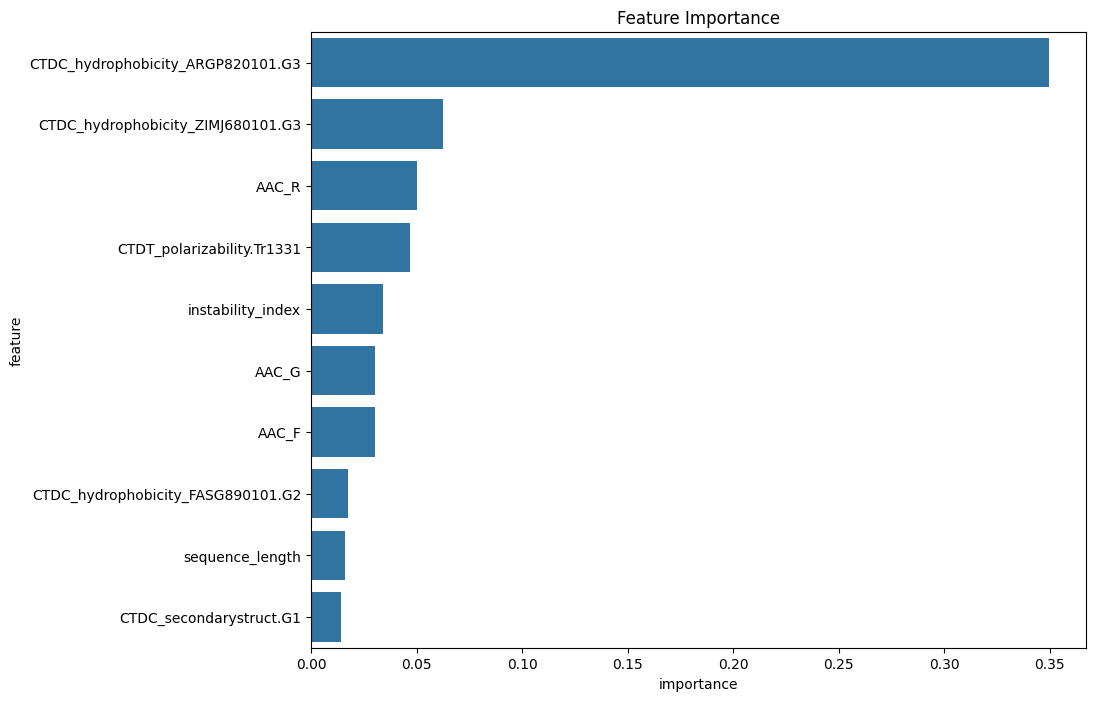

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Numerical dataframe
df_numerical_columns = df.select_dtypes(include=['number'])

# Separate features and target variable
X = df_numerical_columns.drop(columns=["kcat"])
y = df_numerical_columns["kcat"]

# Train a Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importances
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
})

# Sort the DataFrame by importance values and get the top 10 most important features
importance_df = importance_df.sort_values(by='importance', ascending=False).head(10)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('importance')
plt.ylabel('feature')
plt.show()

### 0.2.2 Histograms of Important Features

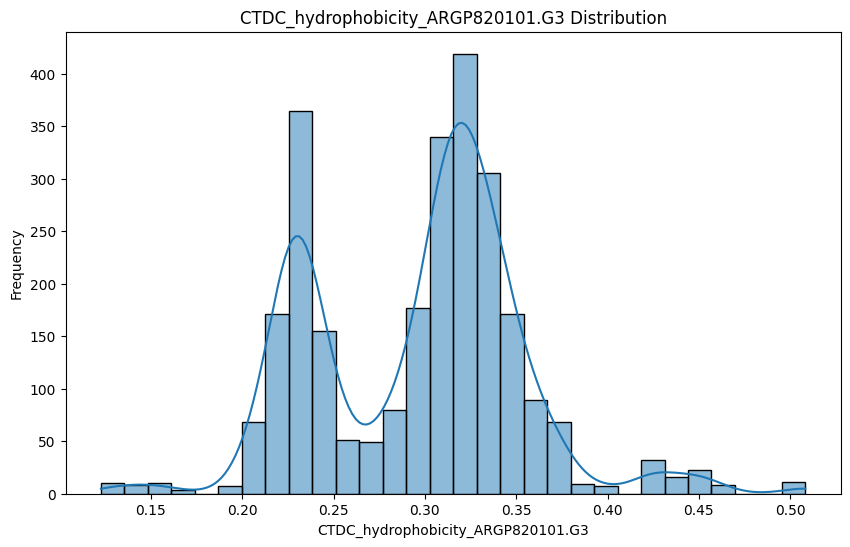

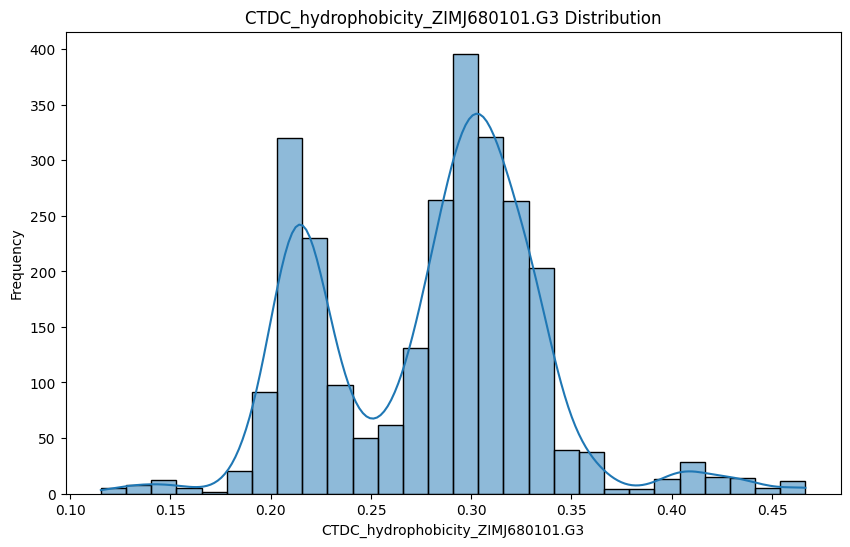

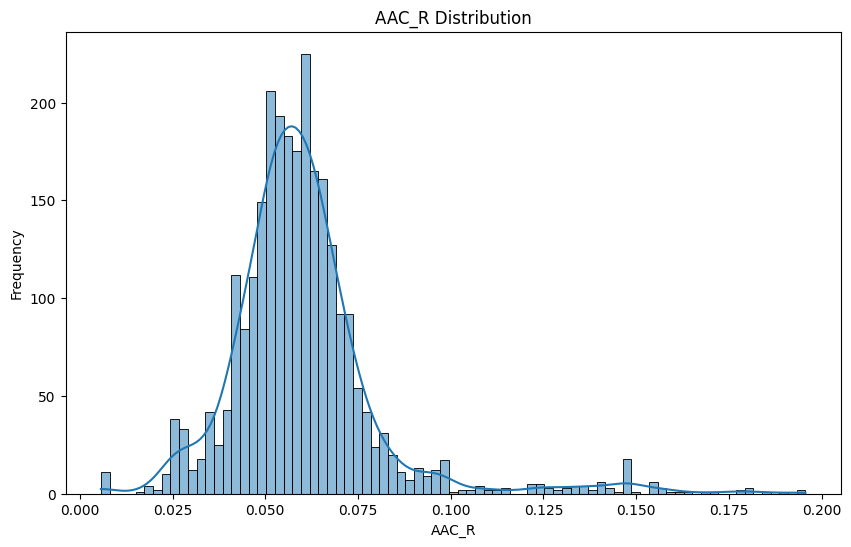

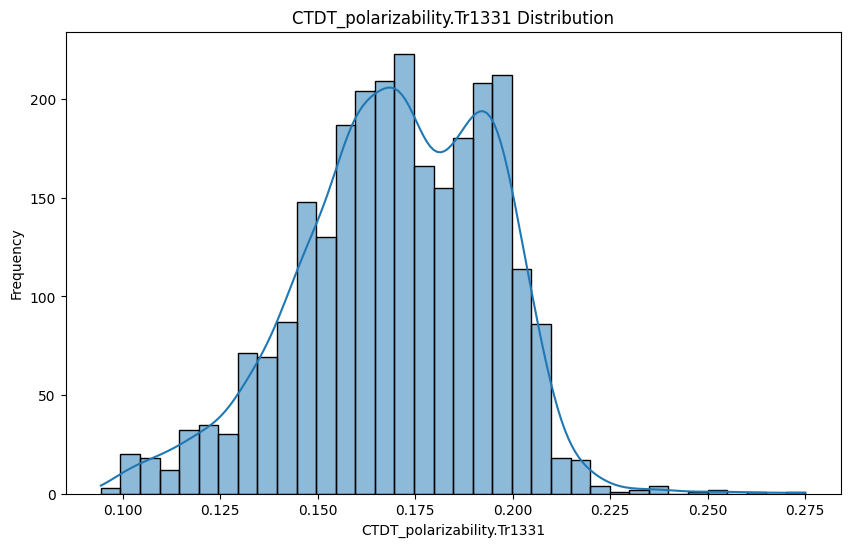

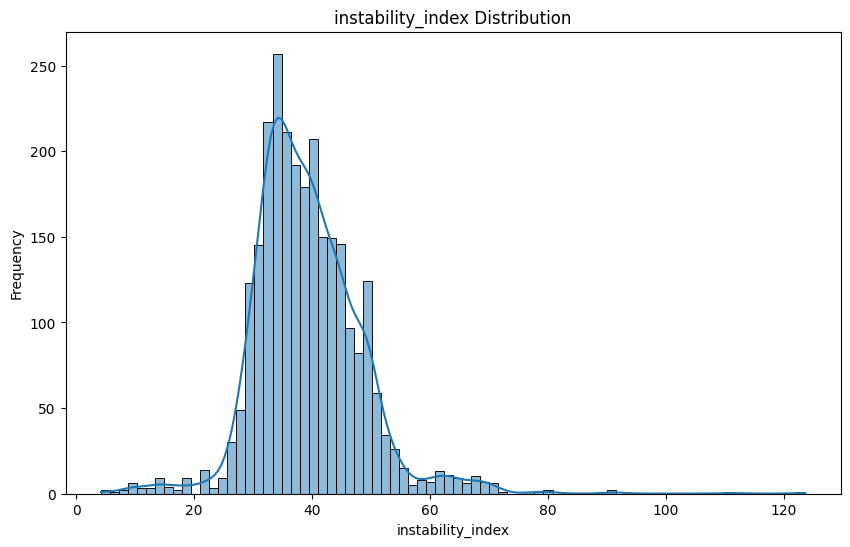

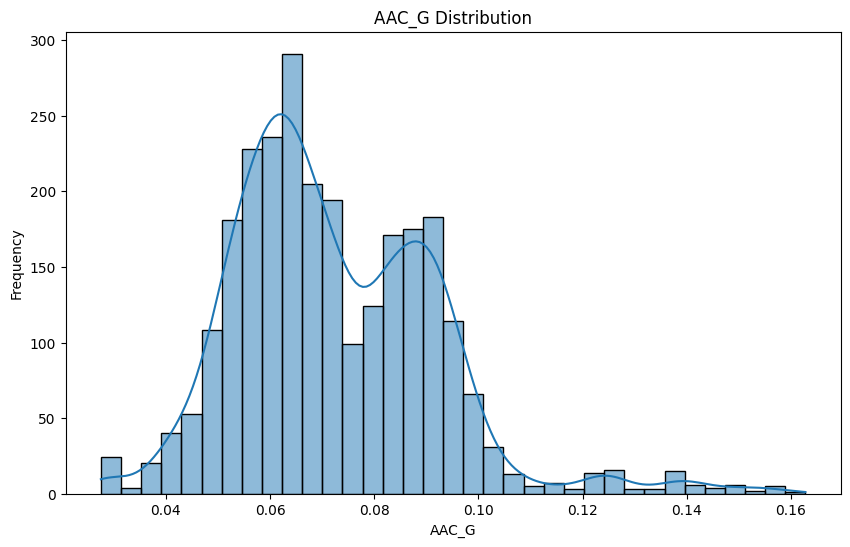

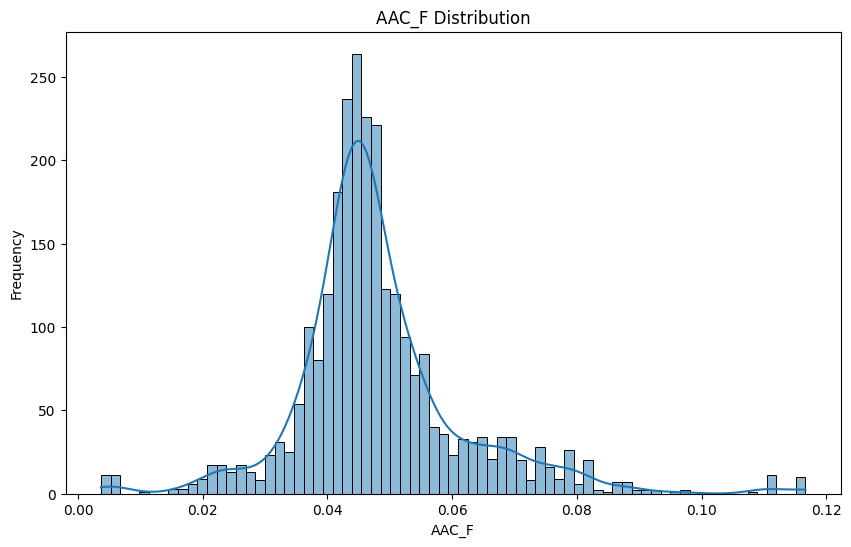

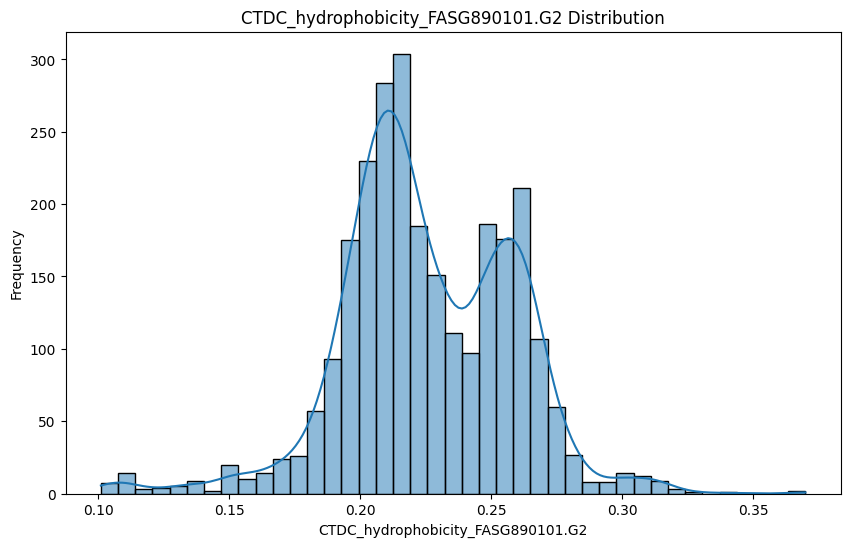

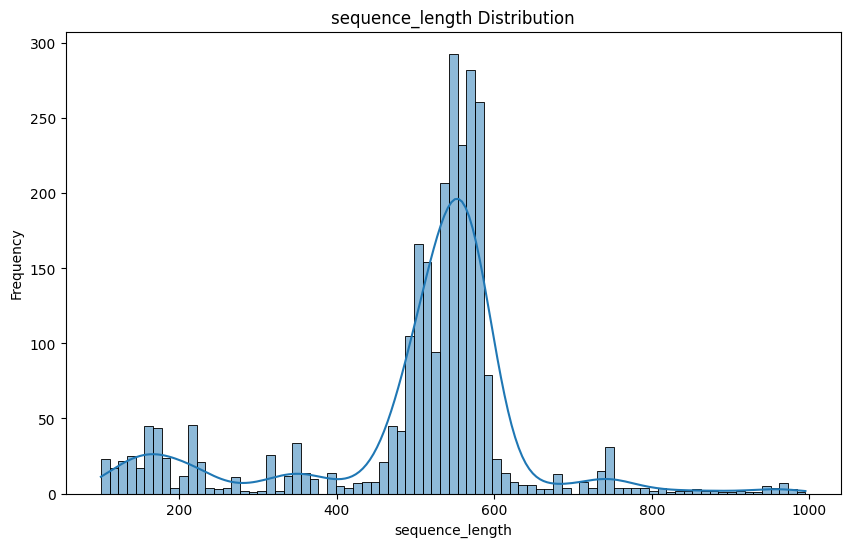

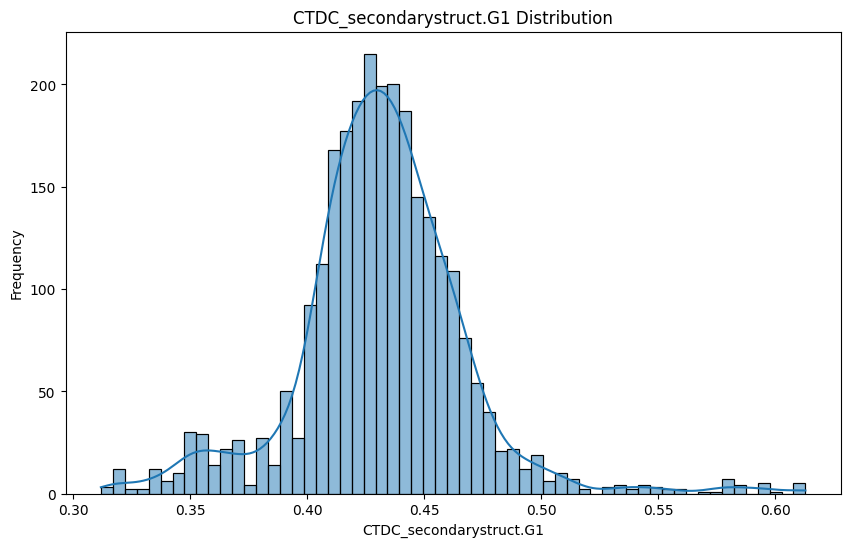

In [25]:
# plot histogram for each important feature

for feature in importance_df['feature']:
	plt.figure(figsize=(10, 6))
	sns.histplot(df[feature], kde=True)
	plt.title(f'{feature} Distribution')
	plt.xlabel(feature)
	plt.ylabel('Frequency')
	plt.show()

### 0.2.3 Correlation Heatmap

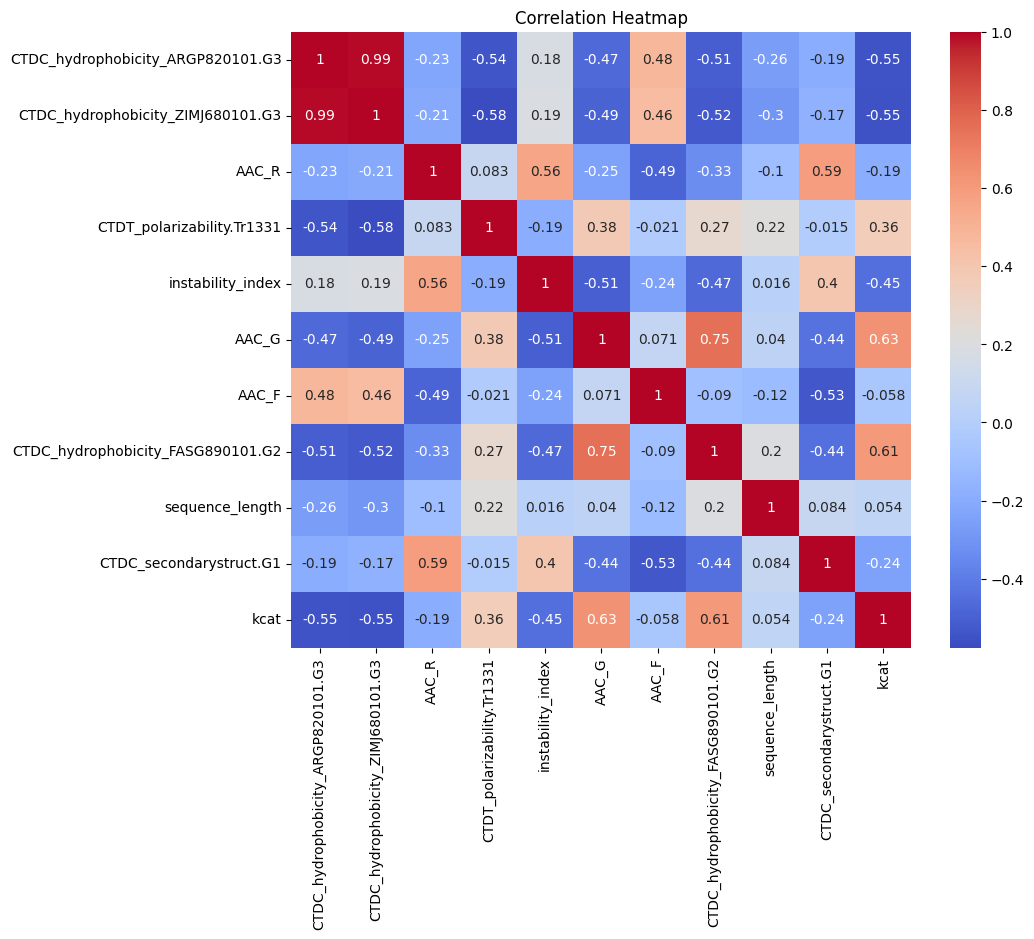

In [27]:
# plot heatmap of important features with the target variable
plt.figure(figsize=(10, 8))
sns.heatmap(df[importance_df['feature'].to_list() + ['kcat']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 0.3 Store Cleaned Data

In [14]:
df.to_csv('./data/csv/cleaned_data.csv', index=False)